In [2]:
# Team Members
# Joed Quaye 
# Ronald Chomnou 
# Griffin Araujo

# Part 1: Wrangling
# compute a relation containing the total payroll and winning percentage for each team

import sqlite3
import pandas 
import numpy

# creating Connection object that represents the database
connection = sqlite3.connect('lahman2014.sqlite')

# create cursor object to perform SQL commands
c = connection.cursor()

# tabulating payroll for each year 
salary_query = "SELECT yearID, teamID, sum(salary) as total_payroll FROM Salaries WHERE lgID == 'AL' GROUP BY yearID, teamID"

# Read SQL query or database table into a DataFrame.
team_salaries = pandas.read_sql(salary_query, connection)

team_query = """
    SELECT 
        teamID,
        yearID,
        sum(W) as total_wins,
        sum(G) as total_games,
        CAST(sum(W) AS FLOAT) * 100.0 / CAST(sum(G) AS FLOAT) as winning_percentage
    FROM Teams
    GROUP BY teamID, yearID
"""

# mean_query = "SELECT yearID, sum(salary)/count(salary) as salary_mean FROM Salaries GROUP BY yearID"

team_table = pandas.read_sql(team_query, connection)
# mean_table = pandas.read_sql(mean_query, connection)

# the team salaries

result = pandas.merge(team_salaries, team_table, how='outer', on=['yearID', 'teamID'])
# result = result = pandas.merge(result, mean_table, how='outer', on=['yearID'])

# this is the table
result 


# with the missing data, we just ignored it because we used inner join after obtaining the data from the SQL query 
# (that's why some of the data shows up as NaN)

,yearID,teamID,total_payroll,total_wins,total_games,winning_percentage
0,1871,BS1,NaN,20,31,64.516129
1,1871,CH1,NaN,19,28,67.857143
2,1871,CL1,NaN,10,29,34.482759
3,1871,FW1,NaN,7,19,36.842105
4,1871,NY2,NaN,16,33,48.484848
...,...,...,...,...,...,...
2770,2014,SLN,NaN,90,162,55.555556
2771,2014,TBA,72689100.0,77,162,47.530864
2772,2014,TEX,112255059.0,67,162,41.358025
2773,2014,TOR,109920100.0,83,162,51.234568


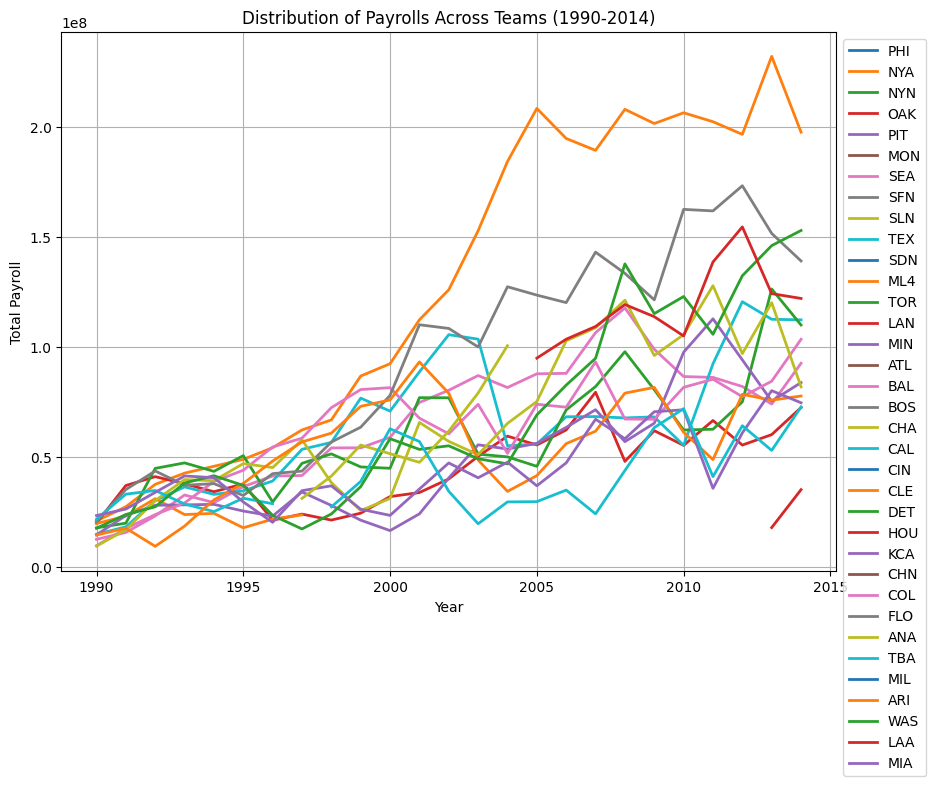

In [3]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Sorting the result DataFrame by 'yearID' in ascending order
result = result.sort_values("yearID", ascending=True)

# Filtering the result DataFrame for the years 1990 to 2014
temp_result = result[(result['yearID'] >= 1990) & (result['yearID'] <= 2014)]

# Creating a copy of the subset to avoid SettingWithCopyWarning
temp_result = temp_result.copy()

# Setting the index of temp_result to 'teamID'
temp_result = temp_result.set_index('teamID')

# Initializing the year variable to 1990
year = 1990

# Plotting the data for each team
teams = temp_result.index.unique()  # Use unique() to get team IDs

plt.figure(figsize=(10, 7))  # Figure Size

for t in teams:
    team_data = temp_result[temp_result.index == t]
    plt.plot(team_data['yearID'], team_data['total_payroll'], label=t, linewidth=2)

plt.xlabel('Year')
plt.ylabel('Total Payroll')
plt.title('Distribution of Payrolls Across Teams (1990-2014)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

#### Question 1
#All of the league's teams have seen an increase in payroll distribution over time, which points to a general upward trend in financial 
# contributions to professional sports. Furthermore, the increasing differences in payrolls between teams point to a rising 
#financial resource gap among them, which may be a reflection of changing economic conditions in the league between 1990 and 2014.

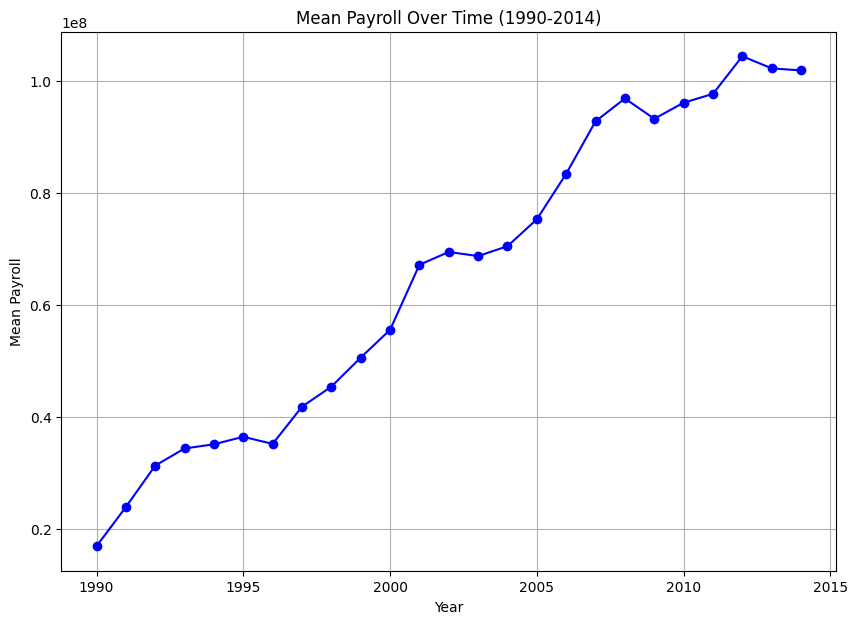

In [4]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Sorting the result DataFrame by 'yearID' in ascending order
result = result.sort_values("yearID", ascending=True)

# Filtering the result DataFrame for the years 1990 to 2014
temp_result = result[(result['yearID'] >= 1990) & (result['yearID'] <= 2014)]

# Grouping by 'yearID' and calculating the mean payroll for each year
mean_payroll_by_year = temp_result.groupby('yearID')['total_payroll'].mean()

# Plotting the mean payroll over time
plt.figure(figsize=(10, 7))  # Adjust the figure size as needed

plt.plot(mean_payroll_by_year.index, mean_payroll_by_year.values, marker='o', linestyle='-', color='b')

plt.xlabel('Year')
plt.ylabel('Mean Payroll')
plt.title('Mean Payroll Over Time (1990-2014)')
plt.grid(True)
plt.show()

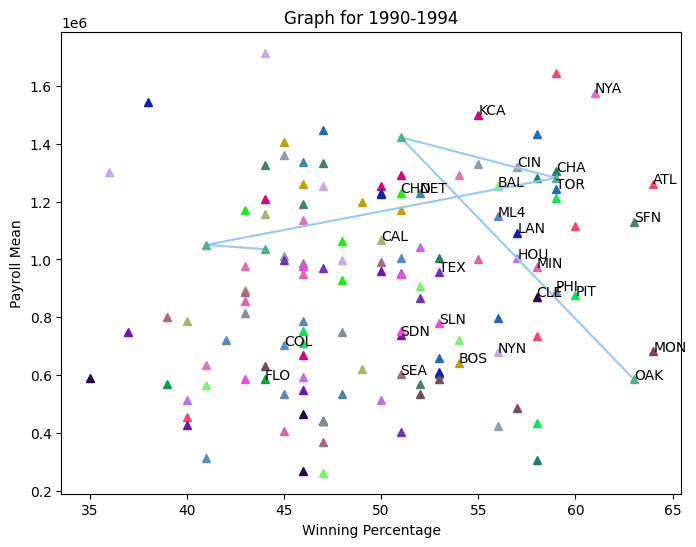

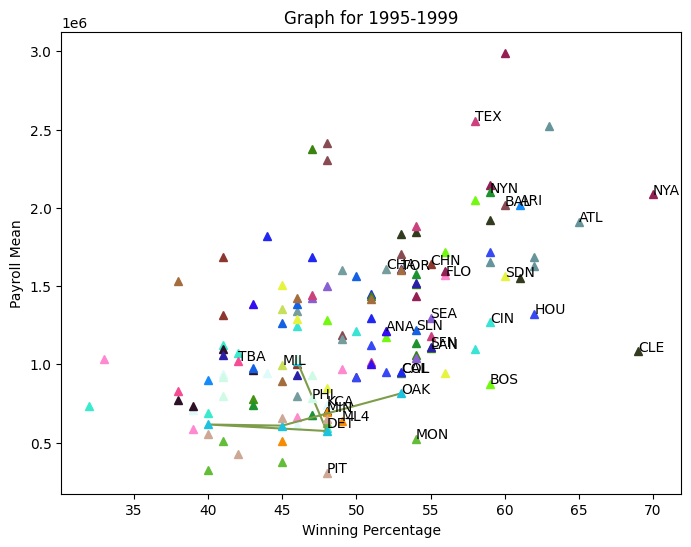

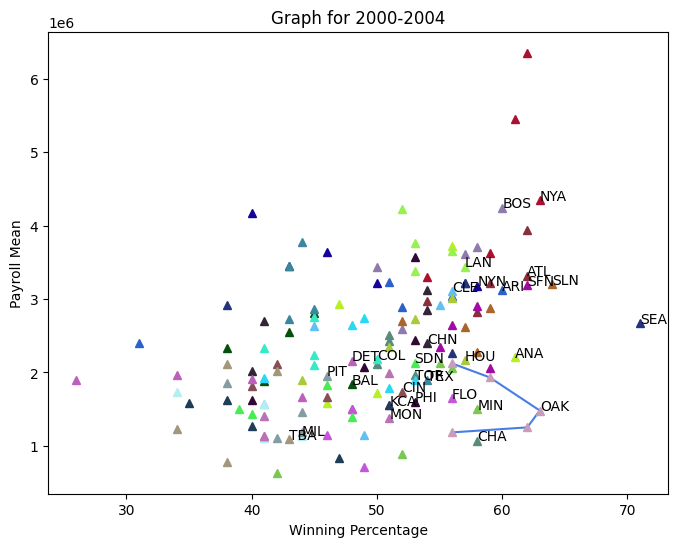

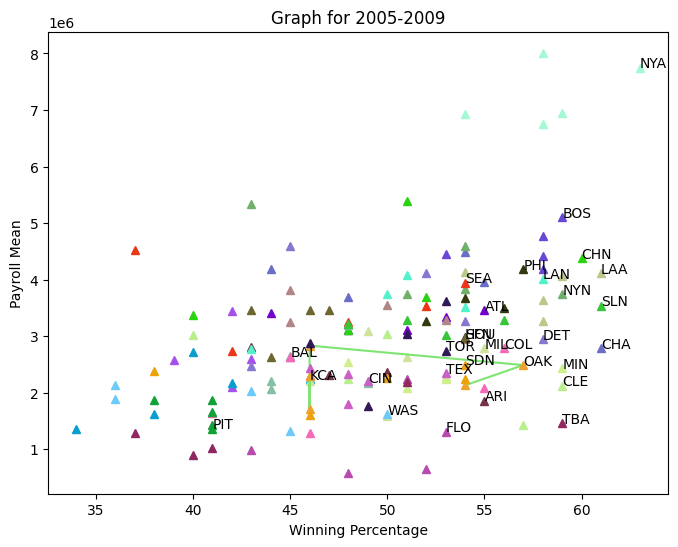

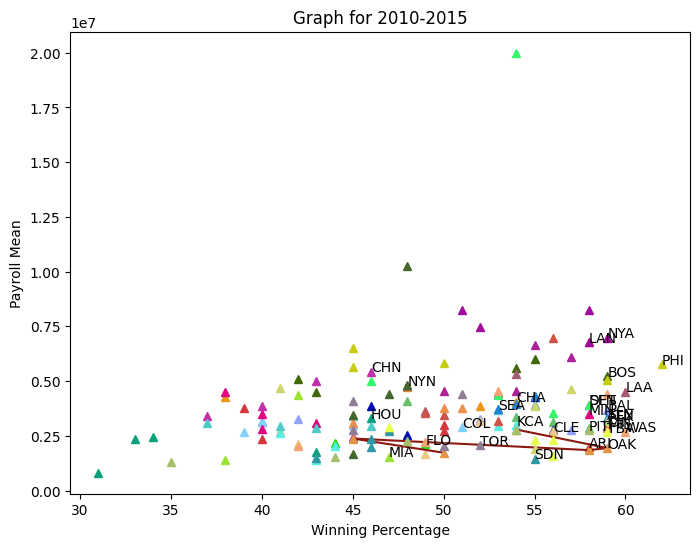

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import sqlite3
import numpy

def plot_graph(group, title):
    plt.figure(figsize=(8, 6))
    teams = group['teamID'].drop_duplicates()
    temp_result = group[['teamID', 'winning_percentage', 'payroll_mean']]
    temp_result = temp_result.set_index('teamID')

    for t in teams:
        temp1 = group.loc[lambda group: group.teamID == t, :]
        
        # Check for NA values before using idxmax()
        if temp1['winning_percentage'].notna().any():
            best_row = temp1.loc[temp1['winning_percentage'].idxmax()]
            plt.annotate(t, xy=(best_row['winning_percentage'], best_row['payroll_mean']))
            
        if t == 'OAK':
            plt.plot(temp_result.loc[t, 'winning_percentage'], temp_result.loc[t, 'payroll_mean'],
                     '-', color=numpy.random.rand(3,))
        plt.plot(temp_result.loc[t, 'winning_percentage'], temp_result.loc[t, 'payroll_mean'],
                 '^', color=numpy.random.rand(3,))

    plt.title(title)
    plt.xlabel('Winning Percentage')
    plt.ylabel('Payroll Mean')
    plt.show()

# Creating Connection object for the database
conn = sqlite3.connect('lahman2014.sqlite')
new_query = "SELECT  teamID, yearID, sum(salary)/count(salary) as payroll_mean FROM Salaries GROUP BY teamID, yearID"
new_query2 = "SELECT  teamID, yearID, W*100/G as winning_percentage FROM Teams GROUP BY teamID, yearID"
query1 = pd.read_sql(new_query, conn)
query2 = pd.read_sql(new_query2, conn)

group_table = pd.merge(query1, query2, how='outer', on=['yearID', 'teamID'])

bins = [1989, 1994, 1999, 2004, 2009, 2015]
group_names = ['1990-1994', '1995-1999', '2000-2004', '2005-2009', '2010-2015']
categories = pd.cut(group_table['yearID'], bins, labels=group_names)
group_table['categories'] = categories

# Drop rows with NaN values in the 'categories' column
group_table = group_table.dropna(subset=['categories'])

grouped = group_table.groupby('categories', observed=False)

# Plot for 1990-1994
plot_graph(grouped.get_group('1990-1994'), 'Graph for 1990-1994')

# Plot for 1995-1999
plot_graph(grouped.get_group('1995-1999'), 'Graph for 1995-1999')

# Plot for 2000-2004
plot_graph(grouped.get_group('2000-2004'), 'Graph for 2000-2004')

# Plot for 2005-2009
plot_graph(grouped.get_group('2005-2009'), 'Graph for 2005-2009')

# Plot for 2010-2015
plot_graph(grouped.get_group('2010-2015'), 'Graph for 2010-2015')

#### Question 2
#The analysis indicates that the New York Yankees consistently excel at paying for wins across all time periods. 
#In contrast, the Oakland Athletics show spending efficiency by maintaining a position within the average or main 
#cluster of teams in the relationship between winning percentage and payroll mean.